# Введение в машинное обучение

## Семинар #5

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Деревья решений (Decision Trees). Случайный лес (Random Forest)

## 1. Деревья решений (Decision Trees)

Дерево принятия решений (также может называться деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.  

Источники:
1. Лекция https://ru.coursera.org/lecture/supervised-learning/rieshaiushchiie-dieriev-ia-HZxD1 
2. https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
3. https://habr.com/ru/post/171759/
4. https://www.hse.ru/mirror/pubs/share/215285956

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Recap прошлого занятия: классификация на выборке ирисов kNN

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


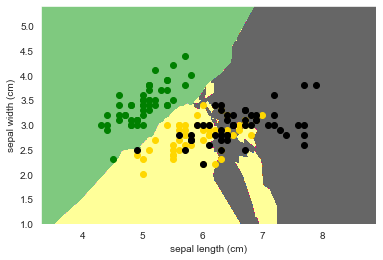

In [4]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [14]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9111111111111111


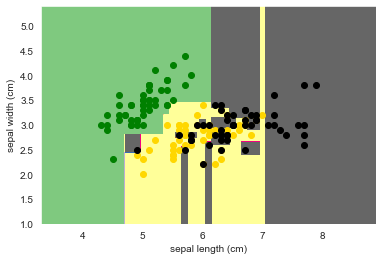

In [6]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = DecisionTreeClassifier(random_state=42).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [15]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

#### Деревья решений можно визуализировать:

Пример классификации данного датасета
    
!['деревьеярешений'](https://scikit-learn.org/stable/_images/iris.png)

### Как переобучиться на Деревьях Решений?

In [19]:

pair = [0, 1]
X = X_train[:, pair]
y = y_train

clf = DecisionTreeClassifier(max_depth = 30, random_state = 42).fit(X, y)  # min_samples_split --?

# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                  feature_names=['petal length', 
#                                                 'petal width'],  
#                                  class_names=iris.target_names,  
#                                  filled=True, rounded=True,
#                                  special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))

0.6666666666666666


In [22]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 5, random_state = 42).fit(X, y)

# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                  feature_names=['petal length', 
#                                                 'petal width'],  
#                                  class_names=iris.target_names,  
#                                  filled=True, rounded=True,
#                                  special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
print(clf.score(X_test[:, pair], y_test))

0.6444444444444445


Посмотрим на справку функции в `sklearn`:

In [26]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Выбор критерия:
    http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf

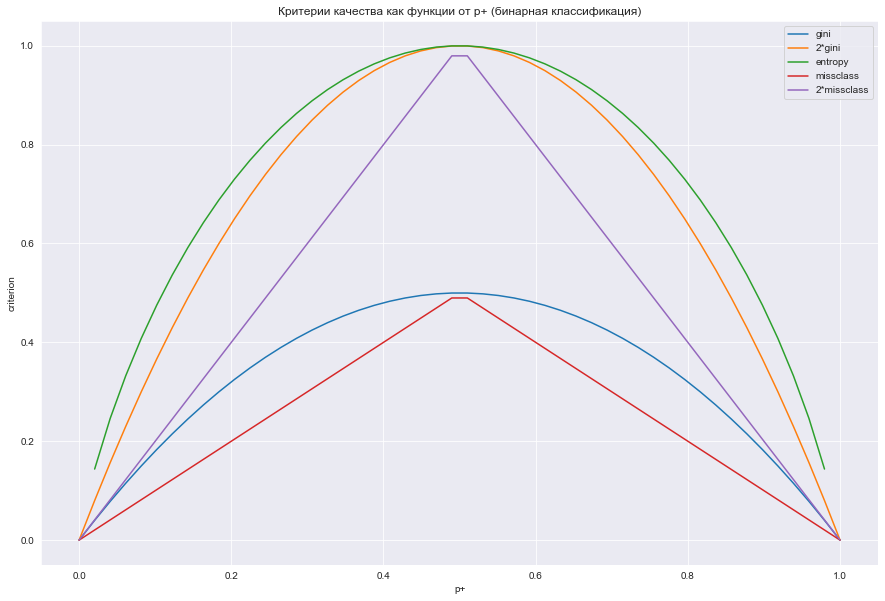

In [25]:
plt.rcParams['figure.figsize'] = (15,10)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

### Регрессия на Деревьях Решений:

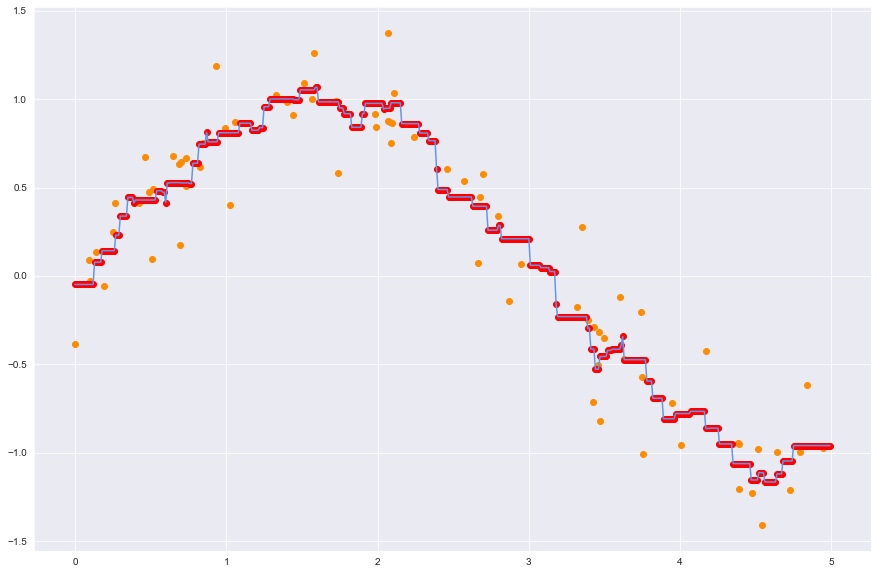

In [69]:
# Recap KNN 
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors = 5, 
                         ).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.scatter(X_test, y_, c='red', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

In [64]:
X.shape, y.shape

((80, 1), (80,))

In [66]:
y_.shape, X_test.shape

((500,), (500, 1))

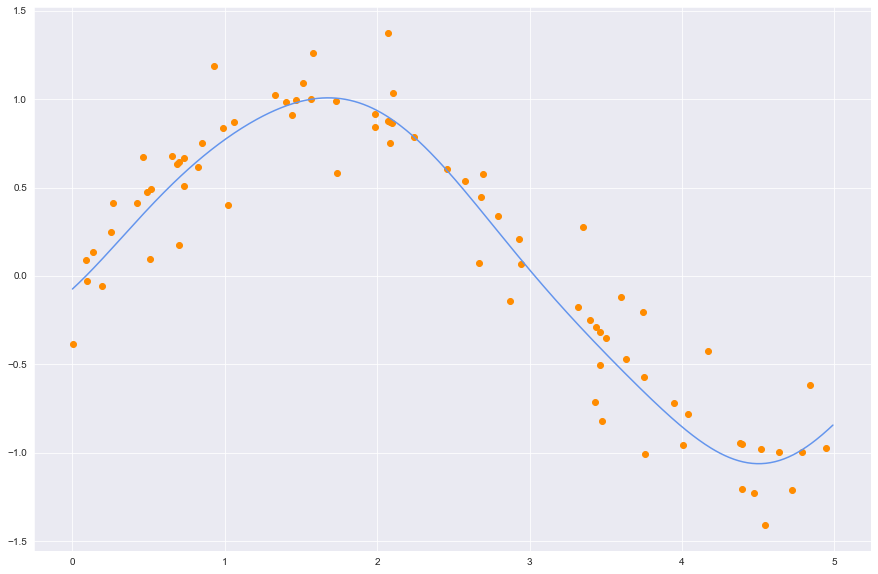

In [34]:
from sklearn.svm import SVR

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = SVR().fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

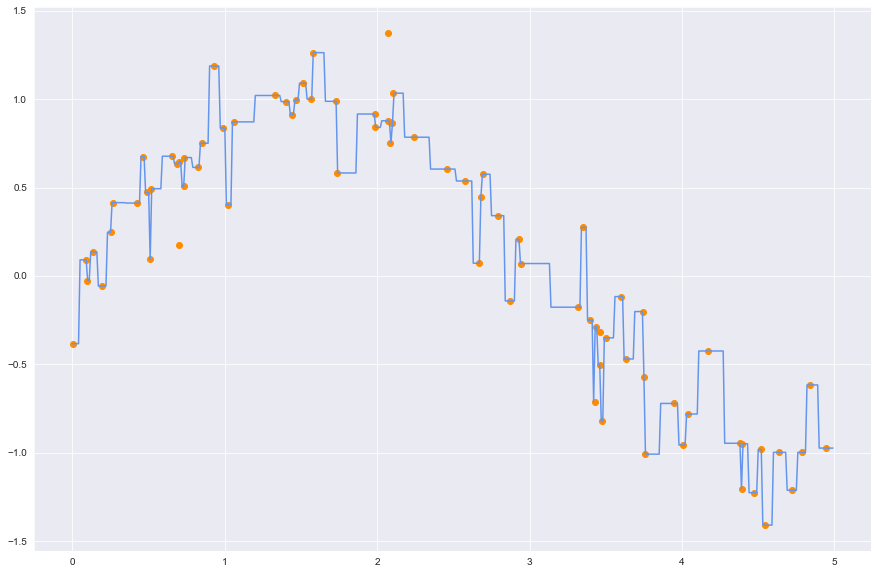

In [57]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = DecisionTreeRegressor().fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

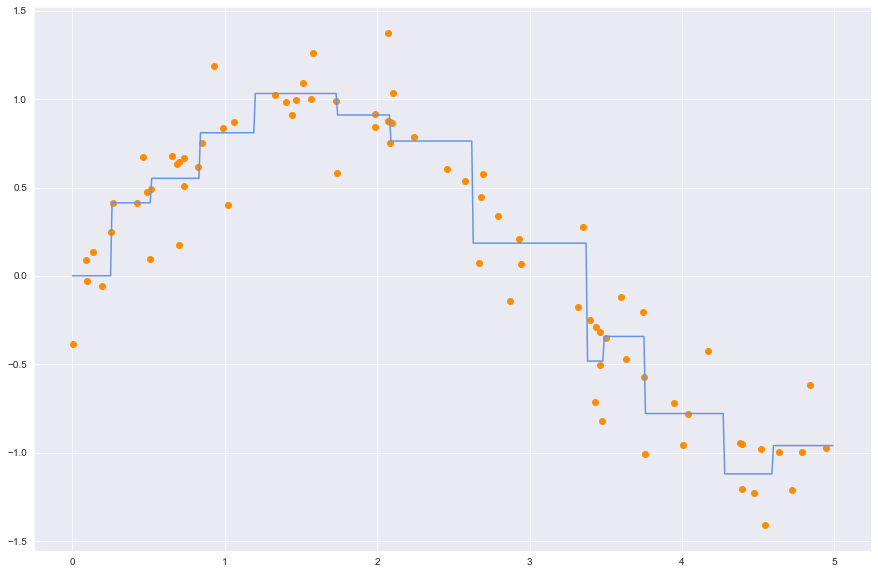

In [39]:
clf = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

В каком из этих трех случаев модель переобучилась? Почему?

Почему не воспроизводится результат DTC на дефолтных параметрах?

In [72]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 2. Леса решений: Random Forest Classification (Regression)

In [74]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, stratify=wine.target, random_state=42)

In [75]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [76]:
wine.data.shape

(178, 13)

In [77]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.976
Accuracy on the test set: 0.981


In [78]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


In [83]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000, random_state = 42, warm_start=True) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 1.000


In [80]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.13904712, 0.0257427 , 0.01384931, 0.00233003, 0.10582456,
       0.04661781, 0.27048422, 0.00524149, 0.01826678, 0.09521495,
       0.14404948, 0.07737182, 0.05595971])

In [84]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.14417845, 0.03007193, 0.01382004, 0.03085946, 0.03256074,
       0.04879288, 0.14020851, 0.01164942, 0.02686486, 0.17132031,
       0.08620422, 0.11395082, 0.14951836])

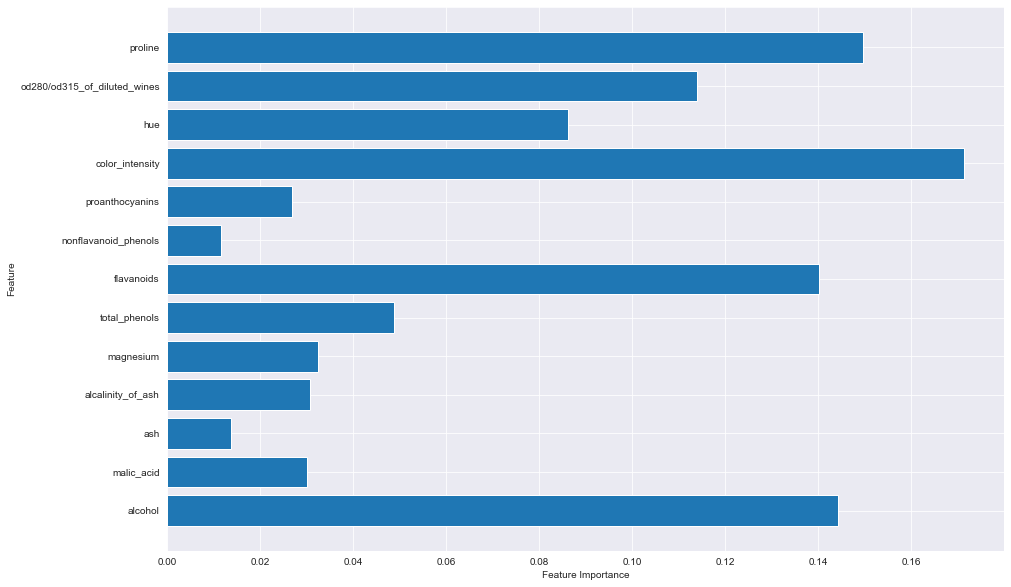

In [85]:
#Feature Importance
n_feature = wine.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), wine.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

In [86]:
X_train=pd.DataFrame(X_train, columns=wine.feature_names)
X_train.drop(['color_intensity','alcohol'], axis=1, inplace=True)

X_test=pd.DataFrame(X_test, columns=wine.feature_names)
X_test.drop(['color_intensity','alcohol'], axis=1, inplace=True)

In [87]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.852


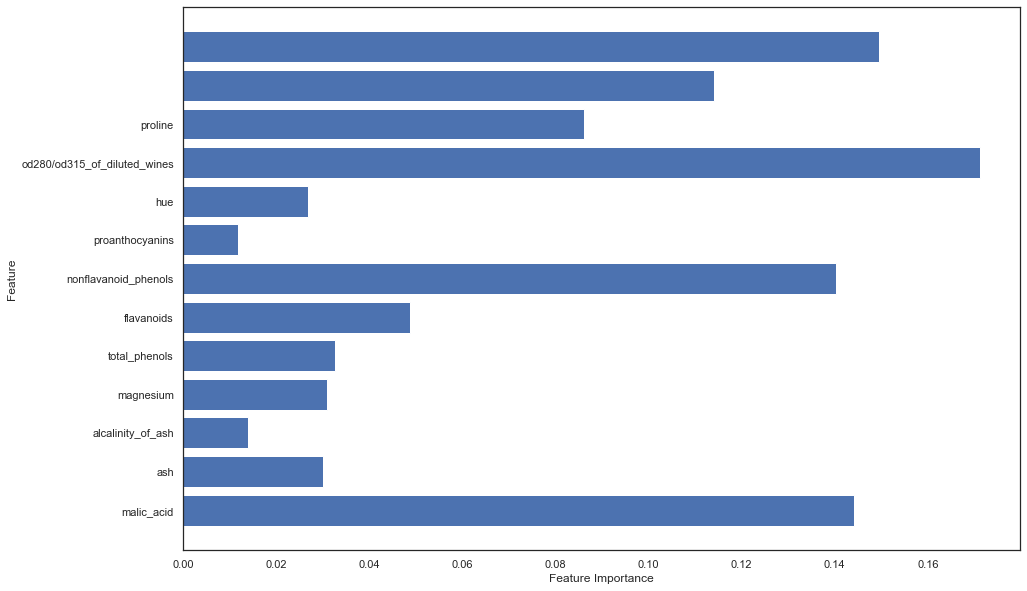

In [98]:
#Feature Importance
n_feature = X_train.shape[1]
plt.barh(range(rfc.feature_importances_.shape[0]), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

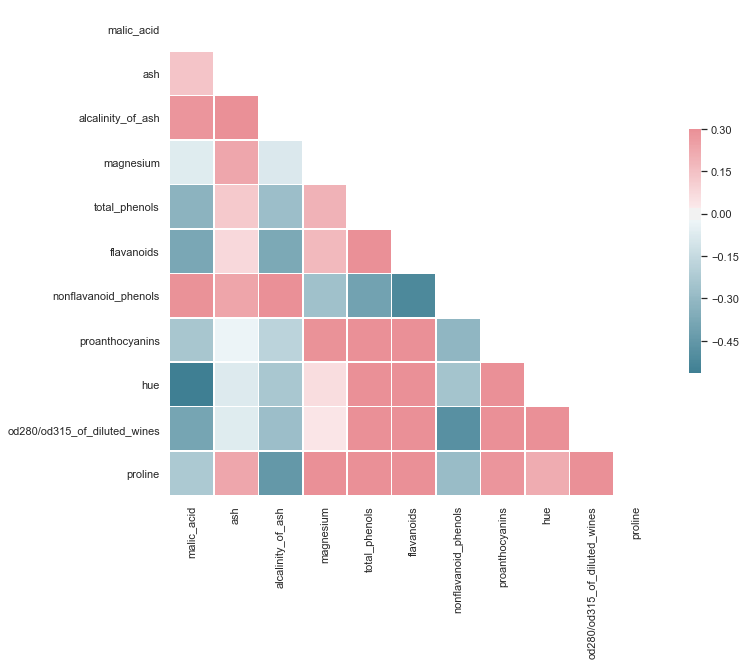

In [99]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(X_train)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [100]:
wine.feature_names[10]

'hue'

In [101]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [102]:
X_train = pd.DataFrame(X_train)
X_train = X_train[X_train.columns[:2]]
X_test = pd.DataFrame(X_test)
X_test = X_test[X_test.columns[:2]]
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.463


In [104]:
dtc.feature_importances_

array([0.61440788, 0.38559212])

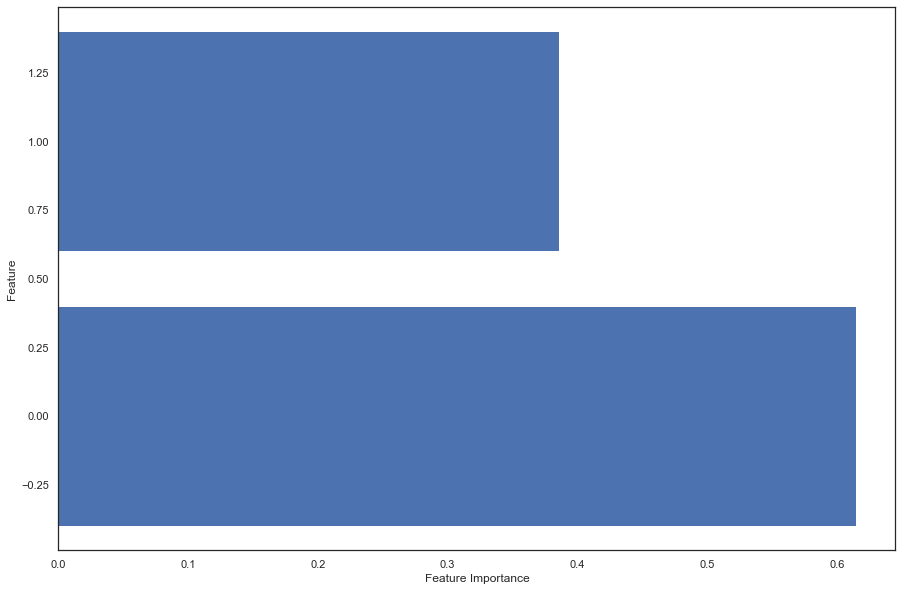

In [105]:
#Feature Importance
n_feature = X_train.shape[1]
plt.barh(range(n_feature), dtc.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [109]:
from sklearn.model_selection import KFold

In [121]:
kfold = KFold(n_splits = 10, shuffle= True)
for train_index, test_index in kfold.split(X, y):
    print(test_index)

[  2   4   9  25  27  28  46  53  76  93 102 108 109 116 118 125 162 176]
[ 16  19  43  49  57  58  70  72  81  84 105 123 128 138 150 157 164 171]
[ 24  38  61  77  78  88  97  98 106 115 122 137 144 146 148 158 159 177]
[  8  10  11  13  29  47  48  54  59  65  80 104 114 124 132 145 149 152]
[ 23  39  40  42  82  85  99 101 107 119 121 129 130 147 151 153 163 170]
[ 14  22  34  35  71  73  90  95 103 136 139 154 155 161 165 166 168 173]
[  3   5  41  50  55  60  64  69  74  75  87  94 112 127 140 141 167 174]
[  1   6   7  12  17  31  36  37  51  66  79  92 110 111 113 117 120 143]
[  0  15  30  32  33  56  62  86  91  96 126 131 133 134 142 160 169]
[ 18  20  21  26  44  45  52  63  67  68  83  89 100 135 156 172 175]


In [124]:
i = 0
list_ = []
kfold = KFold(n_splits = 10)
X = wine.data
y = wine.target

dtc = DecisionTreeClassifier()
for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))    

Fold # 0
1.0
Fold # 1
0.8333333333333334
Fold # 2
0.8888888888888888
Fold # 3
0.6111111111111112
Fold # 4
0.7777777777777778
Fold # 5
1.0
Fold # 6
0.8888888888888888
Fold # 7
0.7222222222222222
Fold # 8
0.8823529411764706
Fold # 9
0.9411764705882353


In [125]:
i = 0
list_1 = []
kfold = KFold(n_splits = 10)
X = wine.data
y = wine.target

dtc = RandomForestClassifier()
for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_1.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))   

Fold # 0
1.0
Fold # 1
0.9444444444444444
Fold # 2
1.0
Fold # 3
0.9444444444444444
Fold # 4
0.9444444444444444
Fold # 5
1.0
Fold # 6
1.0
Fold # 7
0.8888888888888888
Fold # 8
0.8235294117647058
Fold # 9
1.0


In [129]:
np.mean(list_), np.std(list_)

(0.8545751633986928, 0.11664652615374436)

In [130]:
np.mean(list_1), np.std(list_1)

(0.9545751633986927, 0.056668023594582076)

In [131]:
import scipy

scipy.stats.ttest_rel(list_1,list_)

Ttest_relResult(statistic=2.852307489854857, pvalue=0.019017475548223754)

#### Вопрос: как данную модель интерпретировать? Как Дерево решений построило решающее правило?

### Задача 1.  
Сравнить решающее правило на Деревьях Решений и Случайных Лесов Решений для регрессионной задачи на выборке `sklearn.datasets.diabets`

In [143]:
# Визуализации Линейной Регрессии по одному признаку
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

In [146]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [145]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [141]:
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [135]:
y_test.max(), y_test.min()

(310.0, 37.0)

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
y_train = scaler.fit_transform(pd.DataFrame(y_train))
y_test = scaler.transform(pd.DataFrame(y_test))

In [142]:
# non sclaed
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor(random_state=42) 
dtc.fit( X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: -0.094


In [148]:
dtc.score(X_test,y_test)

-4.078897217325638

In [149]:
# non scaled
from sklearn.ensemble import RandomForestRegressor

dtc = RandomForestRegressor(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 0.872
Accuracy on the test set: 0.407


##  Вопросы для самопроверки:

1. В чем отличие Decision Trees от Random Forest?
2. На что влияют критерии построения решающего правила в деревьях?
3. Как интерпретировать результат модели RFC?
4. Почему  важно варьировать `max_depth` дерева?

## Выводы:

1. Дерево – интерпретируемый алгоритм (пока оно не очень глубокое). Random Forest – не интерпретируемый алгоритм
1. Параметр глубины дерева max_depth нужно находить исходя из компромисс между underfitting и overfitting! Можно переобучиться и на тестовом датасете
4. Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
2. Построение дерева DTC и качество модели сильно зависит от того, удачно ли были выбраны сплиты в начале построения!  
3. Стандартной реализации для задачи регрессии вам доступны критерии gini, entropy 
5. Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)

## Задача 2. 
Мы уже знаем 4 принципаильно разных классификатора: LR, KNN, SVC, RFC. 
Сравнить их точности предсказания на датасете `breast cancer`. Использовать классификаторы с натройками по умолчанию. Разбить данные на `train`  и  `test`.

In [153]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

random_state  = 42

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svc= SVC()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

random_state = 42
models = [knn, svc, rfc, lr]

for model in models:
    model.fit(X_train,y_train)# fit the model
    predictions = model.predict(X_test)
    print(str(model)[:10], accuracy_score(y_test, predictions))   

KNeighbors 0.9707602339181286
SVC(C=1.0, 0.9824561403508771
RandomFore 0.9707602339181286
LogisticRe 0.9766081871345029


In [159]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
pipe = Pipeline([('standardizer', scaler), ('svc', svc)])


# Create space of candidate values
search_space = [{'svc__C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'svc__kernel': ['linear', 'rbf','poly']}]
# Create grid search 

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)

In [177]:
clf.best_estimator_.score(X_test, y_test)

0.9766081871345029

In [190]:
clf.best_index_

3

#### Посомтреть результаты поиска по гиперапараметрам:

Вопрос: какая модель называется лучшей (по каким критериям)?

In [191]:
clf.cv_results_

{'mean_fit_time': array([0.00292273, 0.00707474, 0.00468078, 0.00315723, 0.00549126,
        0.00296474, 0.00171919, 0.00320306, 0.00261087, 0.00196581,
        0.00293016, 0.00246887, 0.00221658, 0.0028604 , 0.00243697,
        0.00257921, 0.00323286, 0.00327997, 0.00257545, 0.00288687,
        0.00217214, 0.00262156, 0.00284104, 0.00214686, 0.0033246 ,
        0.00277209, 0.00213361, 0.00308027, 0.00290952, 0.00217433,
        0.00313773, 0.00266528, 0.00217462, 0.00321655, 0.00294991,
        0.0032548 , 0.00306649, 0.00266871, 0.00210261]),
 'std_fit_time': array([3.12501313e-04, 4.70512324e-04, 1.07175351e-03, 1.09845274e-04,
        7.94997491e-04, 5.26465798e-05, 7.32837437e-05, 5.21156183e-05,
        8.24265683e-05, 1.82490845e-04, 4.21932183e-05, 8.22610300e-05,
        1.49438590e-04, 1.38944293e-04, 1.55731001e-04, 4.73646624e-04,
        2.90751730e-04, 5.98890527e-04, 3.47273644e-04, 2.68094185e-04,
        4.69868764e-05, 3.35451521e-04, 2.14455645e-04, 4.62941352e-05,
 

In [178]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [189]:
clf.best_estimator_.named_steps['svc'].coef_

array([[-0.26201082, -0.22287287, -0.2378374 , -0.28905777, -0.01541941,
         0.27647112, -0.36496697, -0.51536565, -0.00876694,  0.09478219,
        -0.5292137 ,  0.115907  , -0.38125249, -0.39128305, -0.06331044,
         0.22286227, -0.08816704, -0.21634629,  0.2081491 ,  0.34617964,
        -0.26925491, -0.59516184, -0.20146133, -0.28104051, -0.28751544,
         0.14348316, -0.4151432 , -0.29063285, -0.53238992, -0.10738949]])

## Задача 3 (Домашнее задание).

1. Построить `feature importances` для каждого классифкатора, посмотреть, какие признаки учавствуют в построении решающего правила
2. Вывести индексы пациентов тестовой выборки, на которых ошибаются классификаторы
3. Вывести все параметры пациентов, сравнить со средними значениями по выборке

## Задача 4 (Домашнее задание). 
Варьировать параметры классификатора для достижения лучшего `score` на тестовой выборке. Внести результат в турнирную таблицу.

Что можно сказать по поводу переобучения при таком дизайне эксперимента?    